In [1]:
#Load Librarues
import numpy as np
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#Feature hashing technique
dataframe = pd.read_csv("F:\Sid\Learnings\Data Scientist\Examples\Similar Companies Clustering using FeatureHashing and CountVectorizer\Wikipedia SP 500 Dataset.csv")\

dataframe.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
2,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...
3,General Electric,Energy,s p 500 s p 500 component industry conglomera...
4,Harley-Davidson,Consumer Discretionary,br s p 500 s p 500 component foundation 1903 ...


In [11]:
text


<466x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 17062 stored elements in Compressed Sparse Row format>

In [3]:
#Implement kmeans with CountVectorizer
#def countVectorizer():
hasher = FeatureHasher(input_type='string')
text = hasher.transform(dataframe.Text).toarray()
pca = PCA(n_components=10)
mod_text = pca.fit_transform(text)

dataset = pd.DataFrame(mod_text)

#-----Convert to categorical variable
#dataset.Title = dataset.Title.astype('category')
kMeansModel = KMeans(n_clusters=3)
kmeans = kMeansModel.fit(dataset)

In [ ]:
%qtconsole

In [4]:
result = pd.concat([dataframe[['Title','Category']],pd.DataFrame(kmeans.labels_)]
                  ,axis = 1)
result.columns = ['Title', 'Category', 'AssignedLabel']

In [18]:
result.columns

Index(['Title', 'Category', 0], dtype='object')

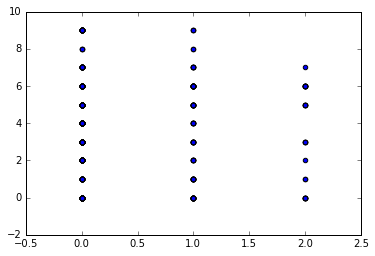

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

result.Category = result.Category.astype("category")
ax.scatter(result.AssignedLabel,result.Category.cat.codes)



In [6]:
tmp = (result.groupby(['Category','AssignedLabel']).count()).reset_index()
tmp.head()
tmp.pivot(index = "AssignedLabel",columns="Category",values = "Title")

Category,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Telecommunications Services,Utilities
AssignedLabel,,,,,,,,,,
0,50.0,21.0,37.0,64.0,45.0,41.0,30.0,23.0,3.0,25.0
1,19.0,12.0,6.0,10.0,7.0,13.0,20.0,6.0,2.0,3.0
2,7.0,2.0,1.0,4.0,NaN,5.0,9.0,1.0,NaN,NaN
